In [209]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/z_/m1kswgl12rj41hvwg8qp08bh0000gn/T/pip-install-dthyz_qc/tensorflow-gpu_d230a016224346a4b00e8a6cc8074bd4/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subp

In [302]:
import numpy as np
import os
import cv2
import pandas as pd
import imghdr
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from PIL import Image

In [427]:
data_dir = 'data1'


In [428]:
data = tf.keras.utils.image_dataset_from_directory('data1')


Found 10448 files belonging to 7 classes.


In [429]:
datacat = data.class_names

In [368]:
data_iterator = data.as_numpy_iterator()

In [369]:
batch = data_iterator.next()

In [371]:
batch[1]

array([1, 0, 3, 5, 4, 5, 1, 6, 4, 1, 2, 5, 6, 1, 1, 2, 2, 1, 4, 5, 2, 3,
       3, 1, 3, 4, 6, 3, 5, 3, 4, 4], dtype=int32)

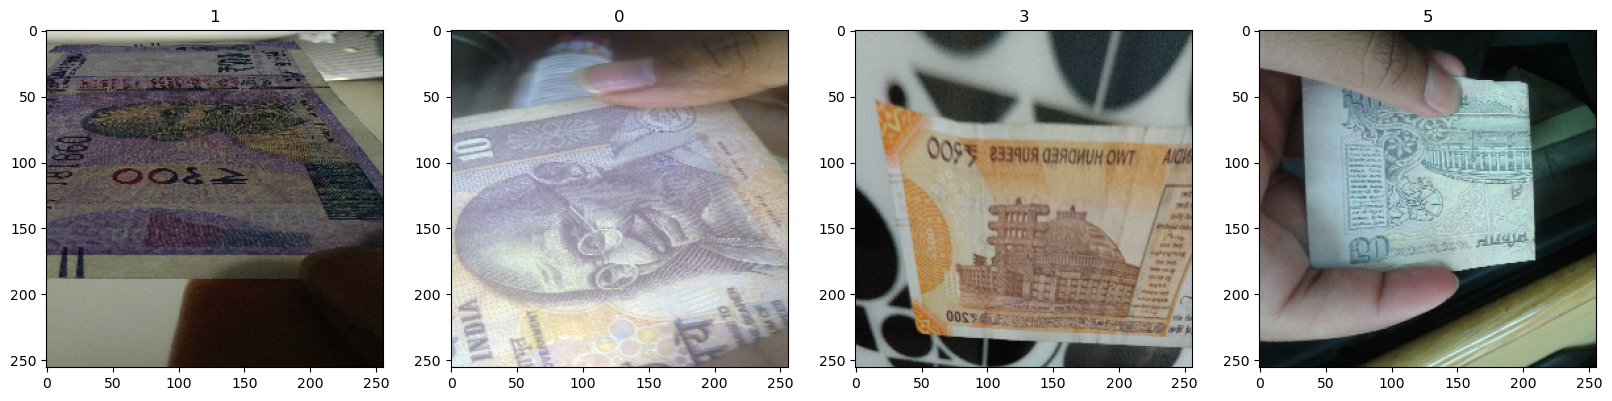

In [372]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# SCALING


In [373]:
data = data.map(lambda x,y: (x/255, y))


In [374]:
data.as_numpy_iterator().next()


(array([[[[0.16122665, 0.23181488, 0.24750115],
          [0.6323558 , 0.6441205 , 0.61029696],
          [0.74136126, 0.7335181 , 0.6864593 ],
          ...,
          [0.8311581 , 0.91351104, 0.92527574],
          [0.8496965 , 0.91591895, 0.93306047],
          [0.6676308 , 0.68186176, 0.71715593]],
 
         [[0.15137006, 0.2219583 , 0.23764457],
          [0.6602156 , 0.6615196 , 0.6138088 ],
          [0.70802695, 0.6923407 , 0.6492034 ],
          ...,
          [0.8522059 , 0.9345588 , 0.95416665],
          [0.7705509 , 0.8215313 , 0.8450607 ],
          [0.4432445 , 0.41971508, 0.4667739 ]],
 
         [[0.4925245 , 0.56311274, 0.578799  ],
          [0.75727636, 0.7415901 , 0.69845283],
          [0.6943541 , 0.67866784, 0.6355306 ],
          ...,
          [0.8639706 , 0.9227941 , 0.9502451 ],
          [0.66161054, 0.69690466, 0.72435564],
          [0.41159716, 0.36821482, 0.42311677]],
 
         ...,
 
         [[0.24283089, 0.24283089, 0.24283089],
          [0.06481

# SPLITING DATA

In [375]:
len(data)

327

In [376]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [420]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


# MODEL

In [421]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import legacy as legacy_optimizers





In [380]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor = 'val_accuracy', patience = 10, restore_best_weights = True)

#  ReduceLROnPlateau Callback to reduce overfitting by decreasing lr
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.6,
                                                  patience=5,
                                                  min_lr=0.00005,
                                                  verbose=1)



# TEST

In [ ]:

# from tensorflow.keras.applications import VGG16


# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


# base_model.trainable = False


#     base_model,
#     Flatten(),
#     Dense(512, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.3),
#     Dense(7, activation='softmax')
# ])


# model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


# model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_14 (Flatten)        (None, 32768)             0         
                                                                 
 dense_36 (Dense)            (None, 512)               16777728  
                                                                 
 batch_normalization_39 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                     

In [383]:
# # Train the model
# hist = model.fit(train, epochs=20, validation_data=val, callbacks=[early_stopping_callback, reduce_lr])



Epoch 1/20
228/228 [==============================] - 1877s 8s/step - loss: 1.7107 - accuracy: 0.4227 - val_loss: 1.0974 - val_accuracy: 0.6014 - lr: 0.0010
Epoch 2/20
228/228 [==============================] - 2078s 9s/step - loss: 0.9245 - accuracy: 0.6680 - val_loss: 0.9062 - val_accuracy: 0.6736 - lr: 0.0010
Epoch 3/20
228/228 [==============================] - 1967s 9s/step - loss: 0.6385 - accuracy: 0.7732 - val_loss: 0.8013 - val_accuracy: 0.7168 - lr: 0.0010
Epoch 4/20
228/228 [==============================] - 1865s 8s/step - loss: 0.4353 - accuracy: 0.8446 - val_loss: 0.8358 - val_accuracy: 0.7264 - lr: 0.0010
Epoch 5/20
228/228 [==============================] - 1899s 8s/step - loss: 0.3367 - accuracy: 0.8761 - val_loss: 0.7759 - val_accuracy: 0.7413 - lr: 0.0010
Epoch 6/20
228/228 [==============================] - 2715s 12s/step - loss: 0.2683 - accuracy: 0.9047 - val_loss: 0.9397 - val_accuracy: 0.7409 - lr: 0.0010
Epoch 7/20
228/228 [==============================] - 273

In [384]:
logdir='logs'

In [385]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


# Performance

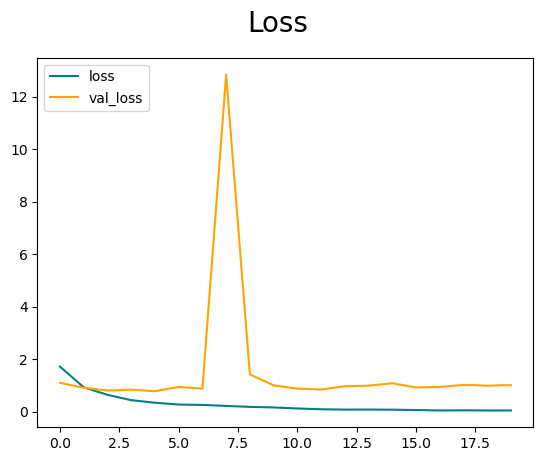

In [386]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

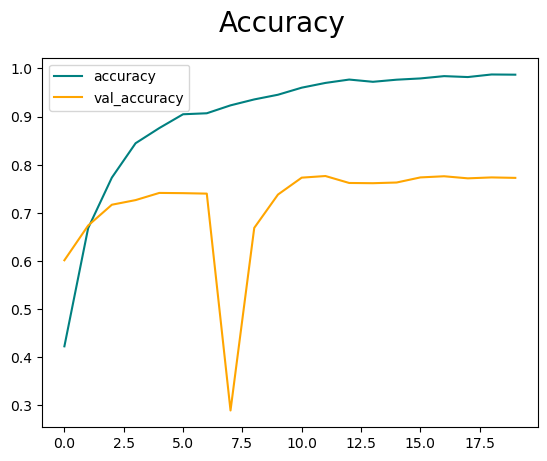

In [387]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [468]:
data_cat = data.class_names

In [469]:
data_cat

['Rs.10', 'Rs.100', 'Rs.20', 'Rs.200', 'Rs.2000', 'Rs.50', 'Rs.500']

In [452]:
image = '10_original_IMG_20190422_124729350.jpg_24be44d6-e496-480b-be1f-f424145cac96.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print('currency in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))



1/1 [==============================] - 1s 613ms/step
currency in image is Rs.200 with accuracy of 31.18


## 

# Model2

In [446]:
input_shape = (256, 256, 3)  

model2 = Sequential([ 
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])
# Compile the model
model2.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

hist2 = model2.fit(train, epochs=20, validation_data=val, callbacks=[early_stopping_callback, reduce_lr])



Epoch 1/20
228/228 [==============================] - 551s 2s/step - loss: 1.7114 - accuracy: 0.3173 - val_loss: 1.3431 - val_accuracy: 0.4942 - lr: 0.0010
Epoch 2/20
228/228 [==============================] - 537s 2s/step - loss: 1.2059 - accuracy: 0.5448 - val_loss: 0.9334 - val_accuracy: 0.6447 - lr: 0.0010
Epoch 3/20
228/228 [==============================] - 531s 2s/step - loss: 0.9046 - accuracy: 0.6605 - val_loss: 0.7415 - val_accuracy: 0.7274 - lr: 0.0010
Epoch 4/20
228/228 [==============================] - 540s 2s/step - loss: 0.7167 - accuracy: 0.7294 - val_loss: 0.6278 - val_accuracy: 0.7538 - lr: 0.0010
Epoch 5/20
228/228 [==============================] - 532s 2s/step - loss: 0.5786 - accuracy: 0.7829 - val_loss: 0.5428 - val_accuracy: 0.7957 - lr: 0.0010
Epoch 6/20
228/228 [==============================] - 536s 2s/step - loss: 0.4652 - accuracy: 0.8259 - val_loss: 0.6283 - val_accuracy: 0.7827 - lr: 0.0010
Epoch 7/20
228/228 [==============================] - 536s 2s/st

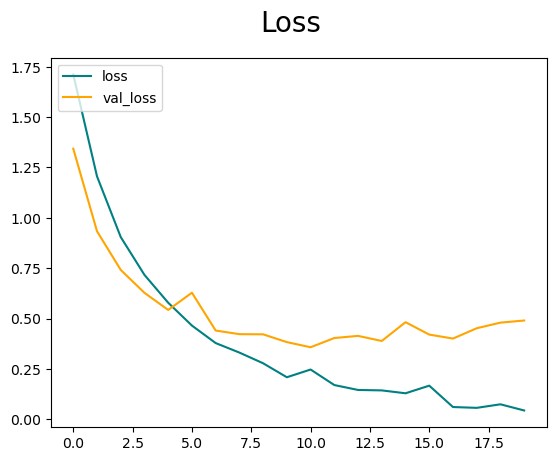

In [447]:
fig = plt.figure()
plt.plot(hist2.history['loss'], color='teal', label='loss')
plt.plot(hist2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

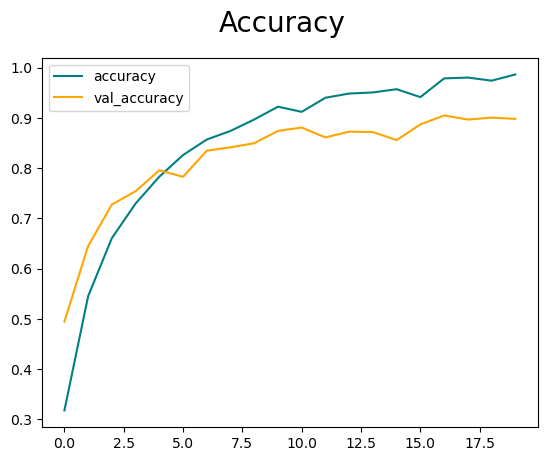

In [448]:
fig = plt.figure()
plt.plot(hist2.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist2.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [470]:
data1 = tf.keras.utils.image_dataset_from_directory('data1')


Found 10448 files belonging to 7 classes.


In [471]:
data_cat1 = data1.class_names
data_cat1

['Rs.10', 'Rs.100', 'Rs.20', 'Rs.200', 'Rs.2000', 'Rs.50', 'Rs.500']

In [1]:
import numpy as np
from keras.preprocessing import image


class_names = ['Rs.10', 'Rs.100', 'Rs.20', 'Rs.200', 'Rs.2000', 'Rs.50', 'Rs.500']


img_path = '/Users/deelakagunasinghe/Downloads/Xvision/backend/Images/test/10 New India/INDIA10NEW_135.jpg'  
img = image.load_img(img_path, target_size=(256, 256))  

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
img_array = img_array / 255.0  


prediction = model2.predict(img_array)


predicted_class_index = np.argmax(prediction[0])


predicted_class_name = class_names[predicted_class_index]

print("Predicted Class:", predicted_class_name)


NameError: name 'model2' is not defined

In [483]:
model2.save('curr1') 

INFO:tensorflow:Assets written to: curr1/assets


INFO:tensorflow:Assets written to: curr1/assets
